In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
surveys_df = pd.read_csv('../ecology-data/surveys.csv')
surveys_df.shape

(35549, 9)

## Preprocessing
We make our lives a bit easier by removing lines that have missing values

In [3]:
surveys_df = surveys_df.dropna()
surveys_df.shape

(30676, 9)

And we limit our analysis to the 'Dipodomys	merriami' species (Kangaroo Rat):
![Kangaroo rat](https://upload.wikimedia.org/wikipedia/commons/a/a4/Merriam%27s_Kangaroo_Rat.jpg "Kangaroo Rat")


In [4]:
dm_df = surveys_df[surveys_df['species_id']=='DM']
dm_df.shape

(9727, 9)

## Correlation and logistic regression

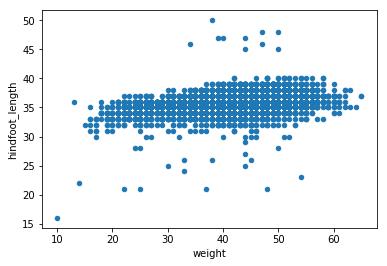

In [5]:
dm_df.plot('weight', 'hindfoot_length', kind='scatter')

In [6]:
weights = dm_df['weight'].values
type(weights)

numpy.ndarray

In [7]:
lengths = dm_df['hindfoot_length'].values

In [8]:
from scipy import stats

In [9]:
stats.pearsonr(weights, lengths)

(0.3573719074264195, 6.4095043497782746e-291)

**Exercise:** Look at the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) of the `linregress` function. Use this function to calculate a linear regression with weight as input (independent) variable and hindfoot_length as output (dependent) variable

**Solution**:

In [10]:
stats.linregress(weights, lengths)

LinregressResult(slope=0.07638649938825319, intercept=32.6955327480908, rvalue=0.3573719074264192, pvalue=6.409504349804317e-291, stderr=0.0020243270314801356)

We can plot this line together with the data:

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(weights, lengths)

C:\Users\DafnevanKuppevelt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


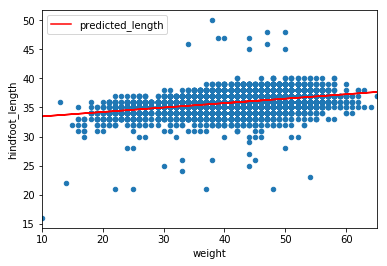

In [26]:
dm_df['predicted_length'] = intercept+slope*weights
ax = dm_df.plot('weight', 'hindfoot_length', kind='scatter')
dm_df.plot('weight', 'predicted_length', ax=ax, color='red')

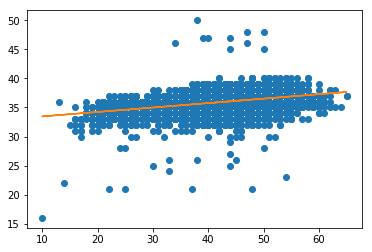

In [12]:
plt.plot(weights, lengths, 'o', label='data')
plt.plot(weights, intercept+slope*weights, label='fitted line')

## T test
We wonder if the hindfoot lenghts of males differs signifcantly from those of females. Let's first have a look at the distribution with a boxplot

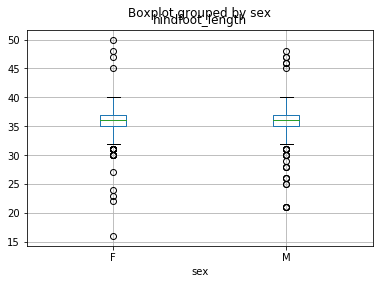

In [13]:
dm_df.boxplot(column='hindfoot_length', by='sex')

In [14]:
male_lengths = dm_df[dm_df['sex']=='M']['hindfoot_length']
female_lenghts = dm_df[dm_df['sex']=='F']['hindfoot_length']

In [16]:
stats.ttest_ind(male_lengths, female_lenghts)

Ttest_indResult(statistic=16.208652834407687, pvalue=2.5368950860999995e-58)

This small p-value suggests a difference between males and females.

**Exercise:** What is the t-statistic for the weights of females and males?

## Normal curve fitting

We suspect that the weights of these rodents are more or less normally distributed, so we want to find the parameters of our normal distribution.
First we plot a histogram of the data:

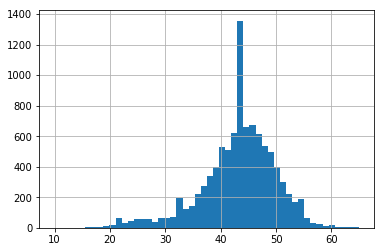

In [17]:
dm_df['weight'].hist(bins=50)

A different way of plotting a histogram is directly with the `plt` module:

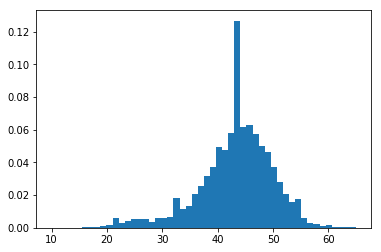

In [18]:
plt.hist(weights, bins=50, density=True, histtype='stepfilled')
plt.show()

Now we use the `stats.norm.fit` function to fit a normal distrubtion

In [19]:
weights = dm_df['weight'].values

In [20]:
loc, scale = stats.norm.fit(weights)
print('mu: ', loc, 'sigma: ', scale)

mu:  43.136013159247454 sigma:  6.820519589215862


We can plot the probability density function of our distribution as follows:

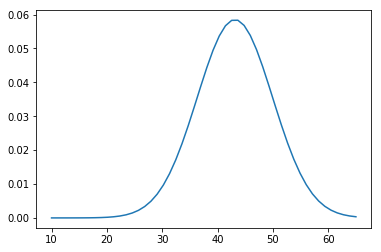

In [22]:
rv = stats.norm(loc, scale)
x = np.linspace(min(weights), max(weights), 50)
plt.plot(x, rv.pdf(x))

And together with the histogram in one plot:

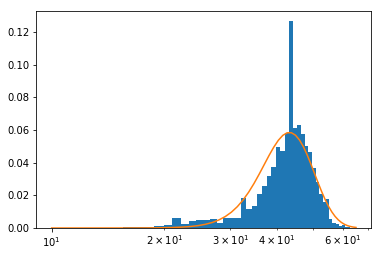

In [23]:
plt.hist(weights, bins=50, density=True)
plt.plot(x, rv.pdf(x))
plt.xscale('log')